#### **Assignment 01**

In [4]:
#Import Essential Librariers
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

256


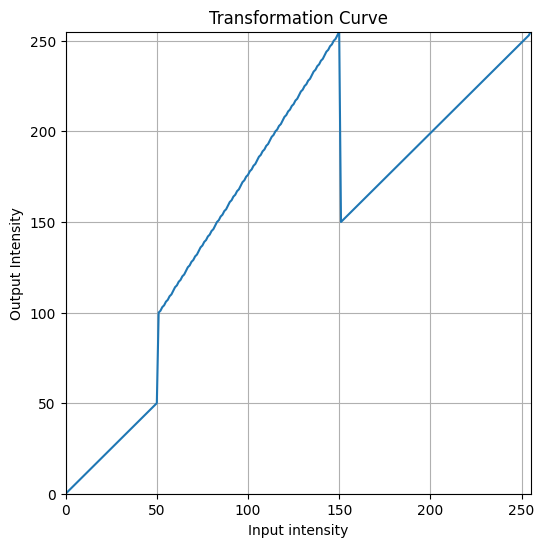

In [93]:
#Declare the control points in an array
c = np.array([50, 100, 150, 200])

#Generating the loockup table segments for transformation
t1 = np.arange(c[0]+1, dtype=np.uint8)
t2 = np.linspace(c[1], 255 , c[2]-c[0]).astype('uint8')
t3 = np.linspace(c[2], 255, 255-c[2]).astype('uint8')

transform = np.concatenate((t1,t2,t3))
print(len(transform))
plt.figure(figsize=(6,6))
plt.plot(range(len(transform)), transform)
plt.title("Transformation Curve")
plt.xlabel("Input intensity")
plt.ylabel("Output Intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid('true')

True

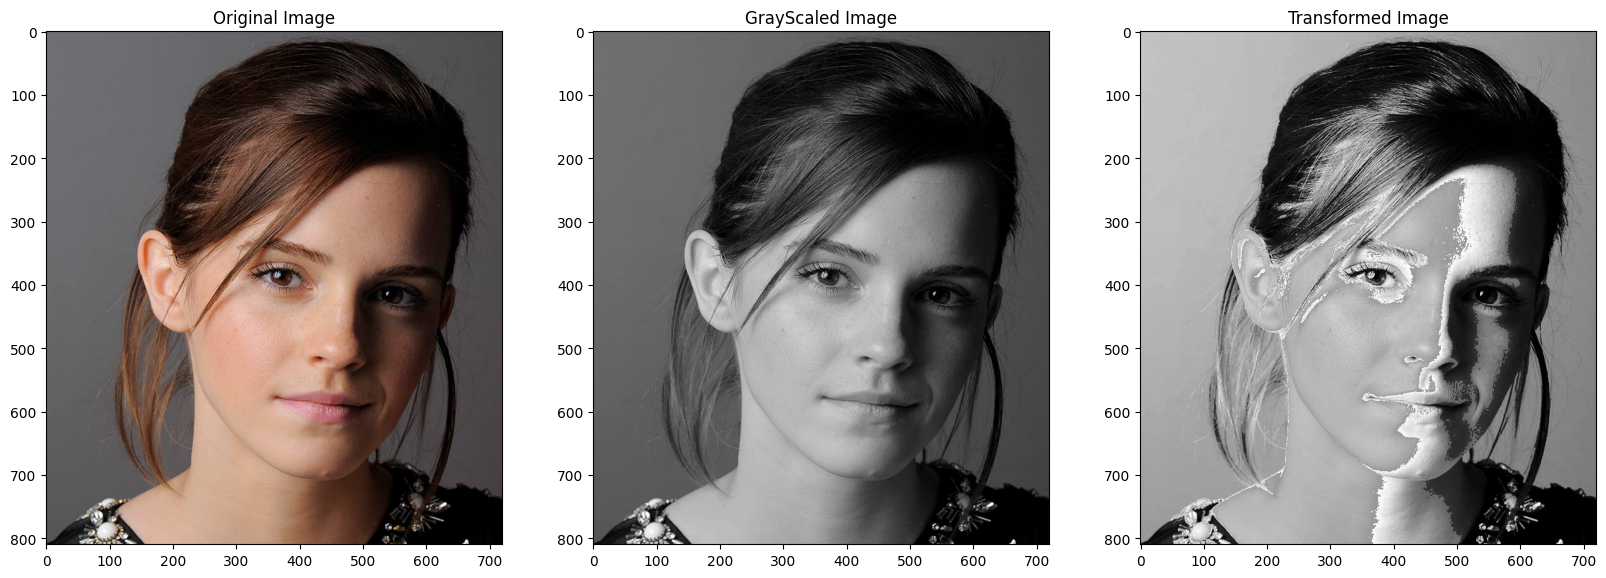

In [26]:
#Read the image
img_original = cv.imread("a1images/a1images/emma.jpg",cv.IMREAD_COLOR)
img_grayscale = cv.imread("a1images/a1images/emma.jpg",cv.IMREAD_GRAYSCALE)

img_transformed = cv.LUT(img_grayscale, transform)

plt.figure(figsize=(20,15))

plt.subplot(1,3,1)
plt.imshow(img_original[:,:,::-1])
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(img_grayscale, cmap='gray')
plt.title("GrayScaled Image")

plt.subplot(1,3,3)
plt.imshow(img_transformed, cmap='gray')
plt.title("Transformed Image")

cv.imwrite("Output_images/emma_transformed.jpg",img_transformed)

#### **02. Accentuate White Matter and Gray Matter**

True

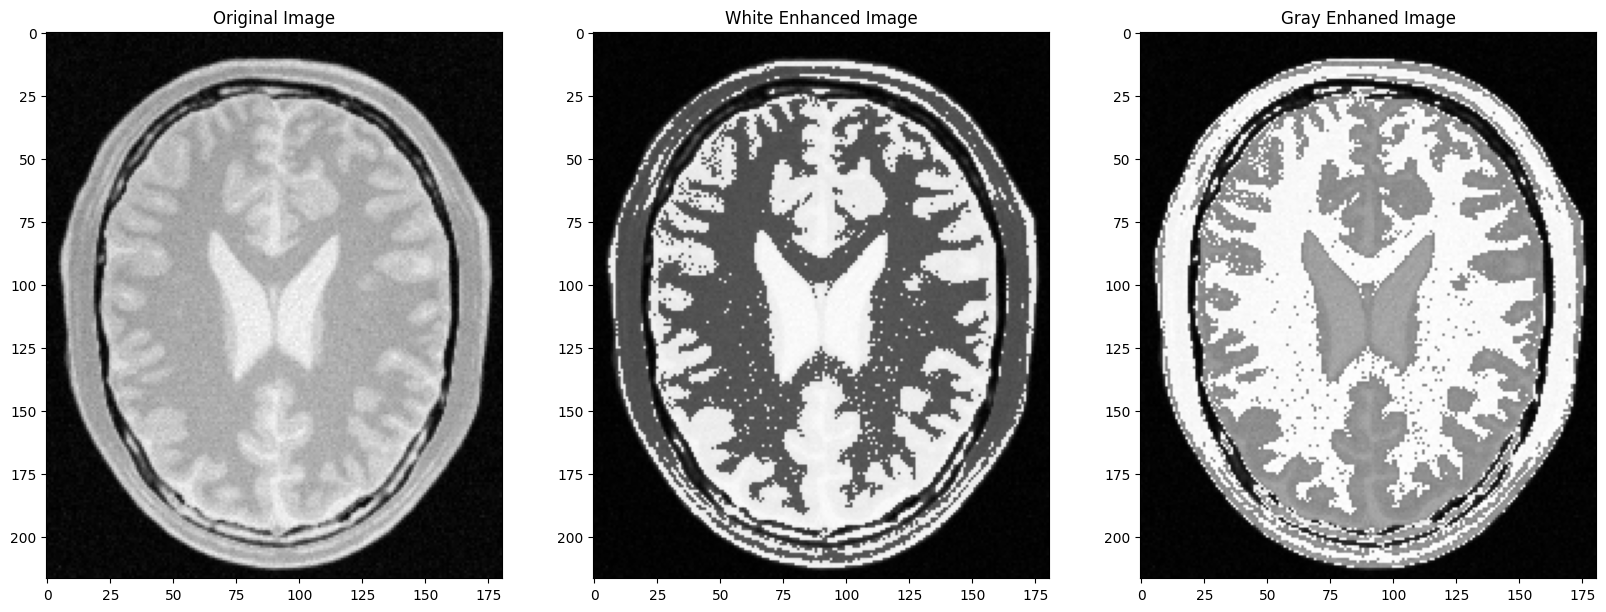

In [ ]:
#Generate LUT to Accentuate white matter
t1=(np.arange(181)*0.5).astype(np.uint8)
t2=np.linspace(230,255,255-180)
transform_white=np.concatenate((t1,t2))

#Generate LUT for Accentuate Gray matter
t_1=(np.arange(111)*0.5).astype(np.uint8)
t_2=np.linspace(230,255,180-110)
t_3=np.linspace(130,180,255-180)
transform_gray=np.concatenate((t_1,t_2,t_3))

#Read the image
brain_img = cv.imread("a1images/a1images/brain_proton_density_slice.png",0)

enhance_white = cv.LUT(brain_img, transform_white)
enhance_gray = cv.LUT(brain_img, transform_gray)

#Display Images
plt.figure(figsize=(20,15))

plt.subplot(1,3,1)
plt.imshow(brain_img, cmap='gray')
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(enhance_white, cmap='gray')
plt.title("White Enhanced Image")

plt.subplot(1,3,3)
plt.imshow(enhance_gray, cmap='gray')
plt.title("Gray Enhaned Image")

#save the images
cv.imwrite("Output_images/white_enhanced_brain_image.png", enhance_white)
cv.imwrite("Output_images/gray_enhanced_brain_image.png", enhance_gray)



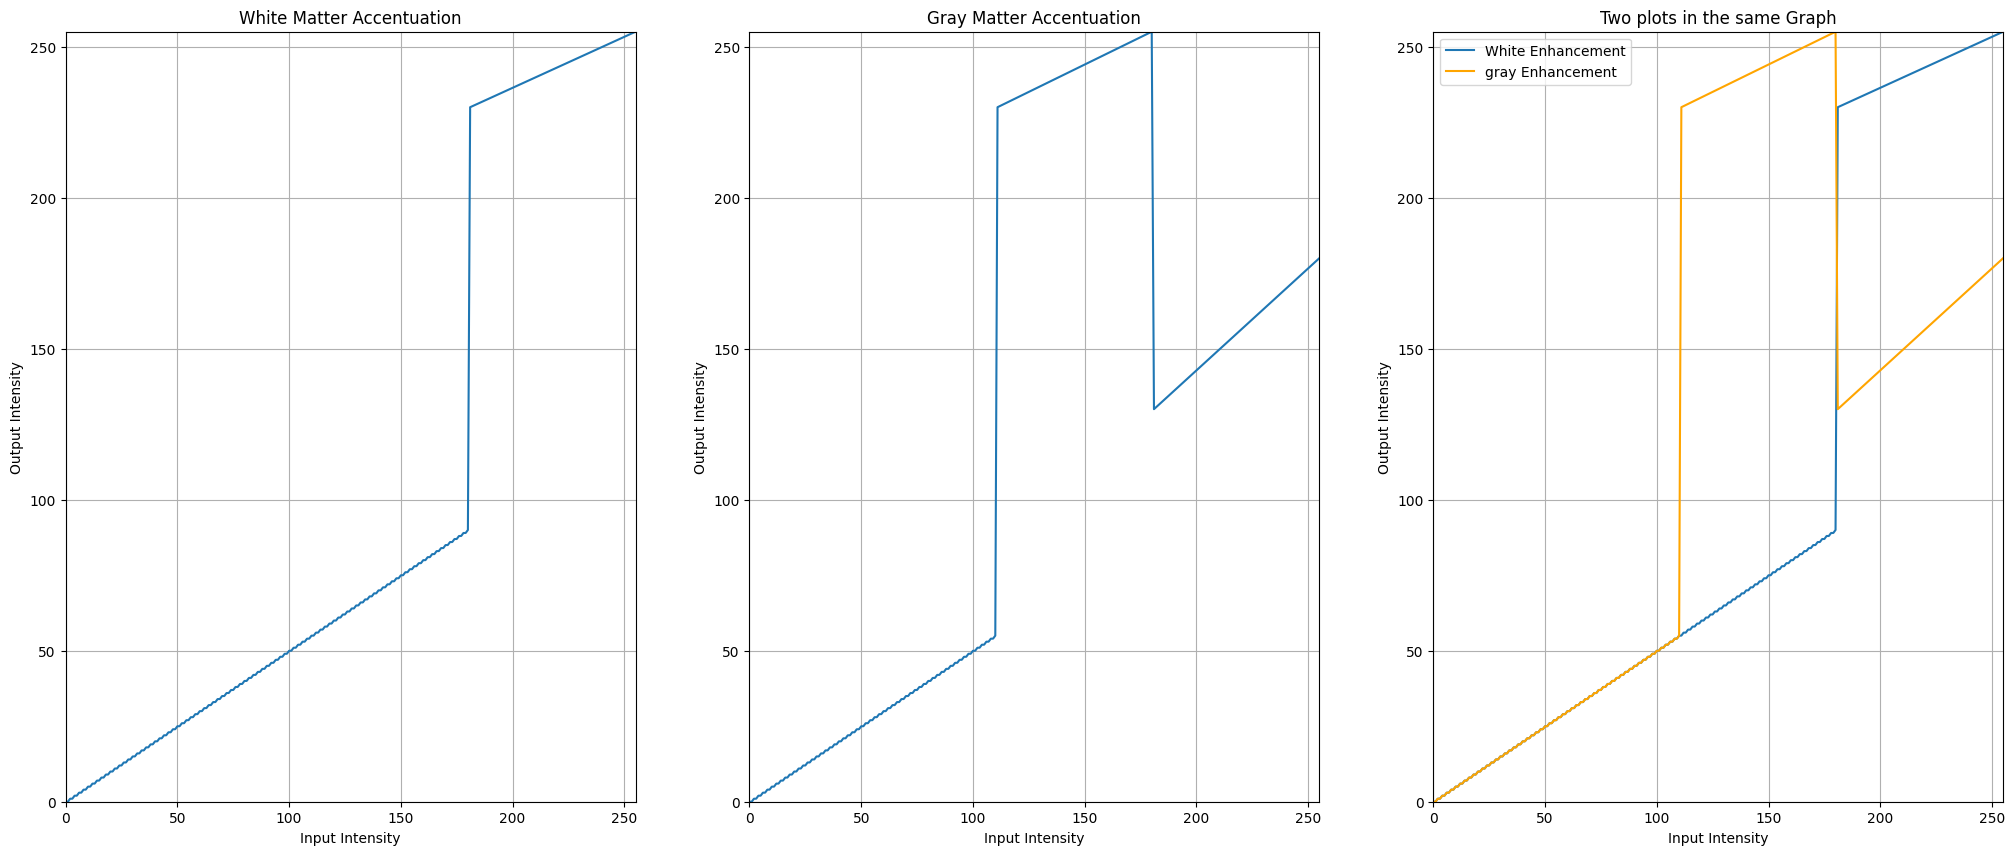

In [94]:
#Plot the transformation Curves
x_vals = np.arange(256)

plt.figure(figsize=(25,10))

plt.subplot(1, 3, 1)
plt.plot(x_vals, transform_white)
plt.title("White Matter Accentuation")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True)

# Plot Gray Matter LUT
plt.subplot(1, 3, 2)
plt.plot(x_vals, transform_gray)
plt.title("Gray Matter Accentuation")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True)

#Plot 2 graphs in the same plot
plt.subplot(1, 3, 3)
plt.plot(x_vals, transform_white, label='White Enhancement')
plt.plot(x_vals, transform_gray, label='gray Enhancement', color='orange')
plt.title("Two plots in the same Graph")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.legend()
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True)

#### **03.Gamma Correction**

Text(0, 0.5, 'Pixel Count')

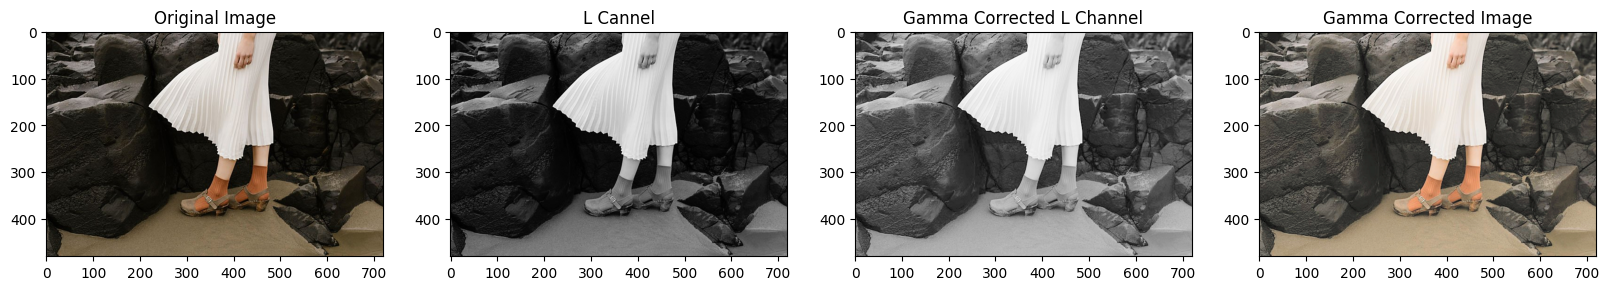

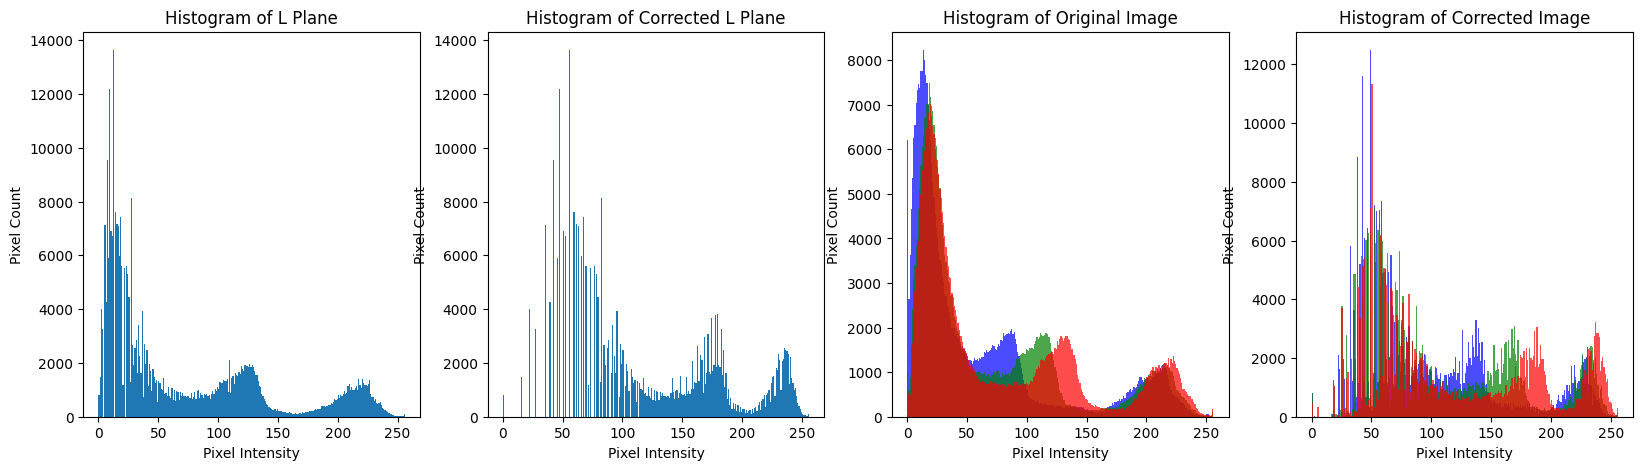

In [99]:
#Read the image
gamma_img = cv.imread("a1images/a1images/highlights_and_shadows.jpg")
#Convert it to the Lab Colorspace
gamma_img_lab = cv.cvtColor(gamma_img, cv.COLOR_BGR2LAB)
#Split the color planes
L,a,b = cv.split(gamma_img_lab)

plt.figure(figsize=(20, 5))
plt.subplot(141); plt.imshow(gamma_img[:,:,::-1]); plt.title("Original Image") 
plt.subplot(142); plt.imshow(L, cmap='gray'); plt.title('L Cannel')

#Gamma correction for L plane
gamma = 0.5
L_corrected = ((L/255)**gamma*255).astype(np.uint8)

plt.subplot(143); plt.imshow(L_corrected, cmap='gray'); plt.title('Gamma Corrected L Channel')

img_corrected = cv.merge((L_corrected,a,b))
gamma_corrected_bgr = cv.cvtColor(img_corrected, cv.COLOR_LAB2BGR)
plt.subplot(144); plt.imshow(gamma_corrected_bgr[:,:,::-1]); plt.title('Gamma Corrected Image')
cv.imwrite("Output_images/gammaCorrected.jpg", gamma_corrected_bgr) 

#Histograms
plt.figure(figsize=(20,5))
plt.subplot(141)
plt.hist(L.flatten(), bins=256, range=(0,256))
plt.title("Histogram of L Plane")
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")

plt.subplot(142)
plt.hist(L_corrected.flatten(), bins=256, range=(0,256))
plt.title("Histogram of Corrected L Plane")
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")


colors = ('b', 'g', 'r')
plt.subplot(143)
for i, col in enumerate(colors):
  plt.hist(gamma_img[:,:,i].flatten(), bins=256, range=(0,256), color=col, alpha=0.7)
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")

plt.subplot(144)
for i, col in enumerate(colors):
  plt.hist(gamma_corrected_bgr[:,:,i].flatten(), bins=256, range=(0,256), color= col, alpha=0.7)
plt.title("Histogram of Corrected Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")
